In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
pd.set_option("display.precision", 2)
%matplotlib inline


# Here, I am examining the "train.csv" file
df = pd.read_csv("/home/leslie/code/melanoma_files/train.csv")

# Below is some general information about our dataset:

In [27]:
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


## As you can see in the code below, I have added extra columns such as "female" (where each row has 1 if the image is of a female and 0 if male), "male," "malignant," etc.

In [28]:
df["female"] = [1 if x == 'female' else 0 for x in df['sex']]
df["male"] = [1 if x == 'male' else 0 for x in df['sex']]

df["malignant"] = [1 if x == 'malignant' else 0 for x in df['benign_malignant']]


df["head_neck"] = [1 if x == 'head/neck' else 0 for x in df['anatom_site_general_challenge']]
df["torso"] = [1 if x == 'torso' else 0 for x in df['anatom_site_general_challenge']]
df["lower_extremity"] = [1 if x == 'lower extremity' else 0 for x in df['anatom_site_general_challenge']]
df["upper_extremity"] = [1 if x == 'upper extremity' else 0 for x in df['anatom_site_general_challenge']]
df["palms_soles"] = [1 if x == 'palms/soles' else 0 for x in df['anatom_site_general_challenge']]
df["oral_genital"] = [1 if x == 'oral/genital' else 0 for x in df['anatom_site_general_challenge']]      

df["age_to_30"] = [1 if (x > 0 and x <= 30) else 0 for x in df['age_approx']]
df["age_30_to_60"] = [1 if (x > 30 and x <= 60) else 0 for x in df['age_approx']]
df["age_60_to_90"] = [1 if (x > 60 and x <= 90) else 0 for x in df['age_approx']]


df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,female,male,malignant,head_neck,torso,lower_extremity,upper_extremity,palms_soles,oral_genital,age_to_30,age_30_to_60,age_60_to_90
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,1,0,1,0,0,0,0,0,0,1,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,1,0,0,0,0,0,1,0,0,0,1,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,1,0,0,0,0,1,0,0,0,0,1,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,1,0,0,1,0,0,0,0,0,0,1,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,1,0,0,0,0,0,1,0,0,0,1,0


## This shows the dimensions of the "table" in the form of rows x columns. In this case we have 33,126 rows and 20 columns.

In [29]:
print(df.shape)

(33126, 20)


## See column titles and info on them below.

In [30]:
print(df.columns)

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target', 'female', 'male', 'malignant', 'head_neck', 'torso',
       'lower_extremity', 'upper_extremity', 'palms_soles', 'oral_genital',
       'age_to_30', 'age_30_to_60', 'age_60_to_90'],
      dtype='object')


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
 8   female                         33126 non-null  int64  
 9   male                           33126 non-null  int64  
 10  malignant                      33126 non-null  int64  
 11  head_neck                      33126 non-null  int64  
 12  torso                          33126 non-null 

In [32]:
df.describe()

,age_approx,target,female,male,malignant,head_neck,torso,lower_extremity,upper_extremity,palms_soles,oral_genital,age_to_30,age_30_to_60,age_60_to_90
count,33058.00,33126.00,33126.00,33126.00,33126.00,33126.00,33126.00,33126.00,33126.00,33126.00,3.31e+04,33126.00,33126.00,33126.00
mean,48.87,0.02,0.48,0.52,0.02,0.06,0.51,0.25,0.15,0.01,3.74e-03,0.14,0.67,0.18
std,14.38,0.13,0.50,0.50,0.13,0.23,0.50,0.44,0.36,0.11,6.11e-02,0.35,0.47,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00
25%,40.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00
50%,50.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00e+00,0.00,1.00,0.00
75%,60.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00e+00,0.00,1.00,0.00
max,90.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00e+00,1.00,1.00,1.00


In [33]:
df.describe(include=['object'])

,image_name,patient_id,sex,anatom_site_general_challenge,diagnosis,benign_malignant
count,33126,33126,33061,32599,33126,33126
unique,33126,2056,2,6,9,2
top,ISIC_0171235,IP_4938382,male,torso,unknown,benign
freq,1,115,17080,16845,27124,32542


## Below, we see how many cases from the train.csv are benign and how many are malignant. Only around 2% of cases are malignant, so if we use this information to train our model it will probably be hesitant to assign the malignant diagnosis.

In [34]:
df['benign_malignant'].value_counts()

benign       32542
malignant      584
Name: benign_malignant, dtype: int64

## There are slightly more males than females represented in the dataset.

In [35]:
df['sex'].value_counts()

male      17080
female    15981
Name: sex, dtype: int64

## This shows how many "anatomy sites" are represented. For example, "torso" is most represented.

In [36]:
df['anatom_site_general_challenge'].value_counts()

torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

## Below, we see more specific information on diagnoses. You'll notice that many cases are unknown and, again, only 584 were classified as melanoma.

In [37]:
df['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

## Mean of the approximate age is almost 49.

In [38]:
df['age_approx'].mean()

48.87001633492649

## Average age of patients who have a malignant lesion is around 58.

In [39]:
df[df['target'] == 1]['age_approx'].mean()

58.13356164383562

## Average age of patients who have a benign lesion is around 49.

In [40]:
df[df['target'] == 0]['age_approx'].mean()

48.70342427788385

# A few histograms that show us the distribution of data:

## Histogram of the approximate age represented in our data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13bb37e3a0>]],
      dtype=object)

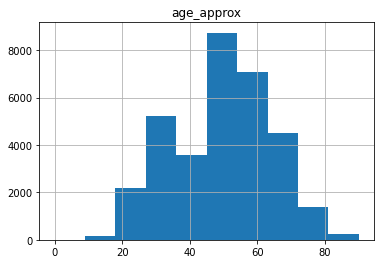

In [41]:
df.hist(column='age_approx')

## Histogram that shows the approximate age of those who had a benign and those who had a malignant lesion (0 = benign, 1 = malignant):

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13baed0490>,
      dtype=object)

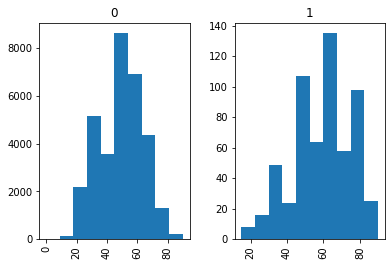

In [42]:
df.hist(column='age_approx', by='target')

## Histograms which show how the anatomy sites are represented by sex. For example, for the anatomy sites of "oral/genital" and "palms/soles," there are more examples for males. On the other hand, females have slightly more examples for "lower extremity" and "upper extremity" sites:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13bada1e50>,
      dtype=object)

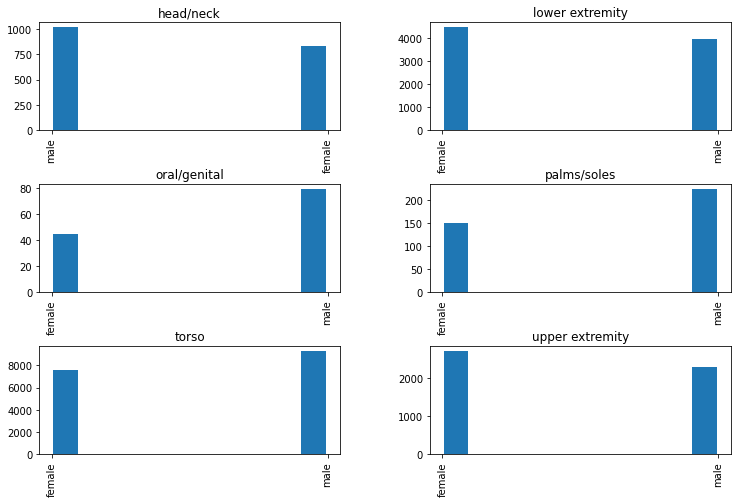

In [43]:
df.hist(column='sex', by='anatom_site_general_challenge', figsize=(12,8), zorder=2, rwidth=0.9)

## Similar to the one above, here is a histogram that shows how the anatomy sites are represented by ages. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13bc2367c0>,
      dtype=object)

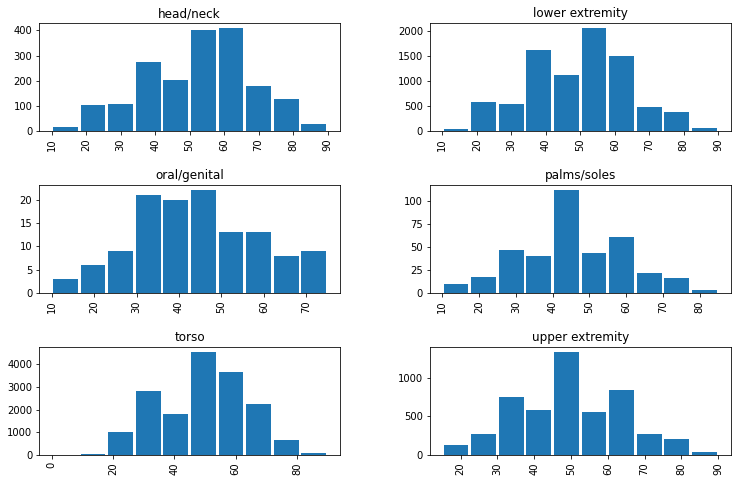

In [44]:
df.hist(column='age_approx', by='anatom_site_general_challenge', figsize=(12,8), zorder=2, rwidth=0.9)

## Histogram that shows the approximate age distribution for males and females who were found to have a malignant lesion:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13ba990760>,
      dtype=object)

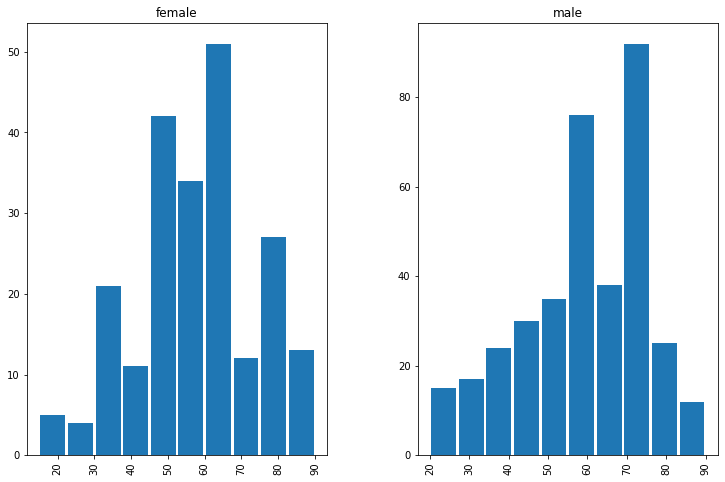

In [45]:
df[df.malignant==1].hist(column='age_approx', by='sex', figsize=(12,8), zorder=2, rwidth=0.9)

## Histogram that shows the approximate age distribution for males and females who were found to have a benign lesion:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13ba8b2f70>,
      dtype=object)

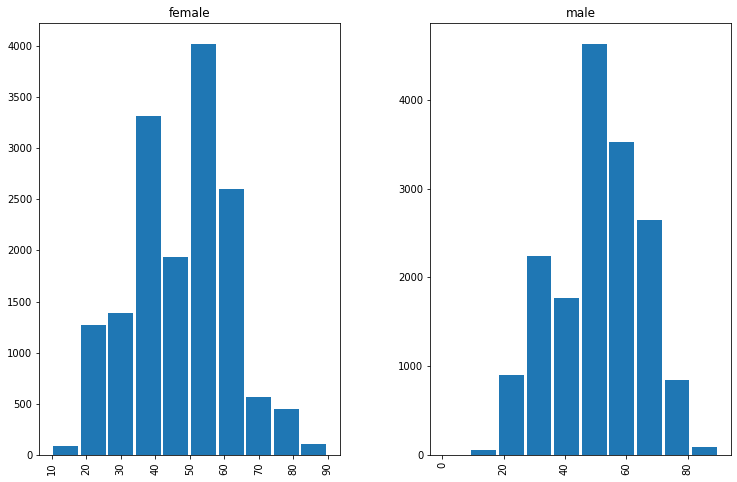

In [46]:
df[df.malignant==0].hist(column='age_approx', by='sex', figsize=(12,8), zorder=2, rwidth=0.9)

## Below are a few more examples of the data we're working with:

In [47]:
columns_to_show = ['age_approx']

df.groupby(['female'])[columns_to_show].describe(percentiles=[])

age_approx                                
            count   mean    std   min   50%   max
female                                           
0         17080.0  50.40  14.38   0.0  50.0  90.0
1         15978.0  47.24  14.20  10.0  45.0  90.0

In [48]:
columns_to_show = ["age_approx"]

df.groupby(['female'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

age_approx                   
             mean    std  amin  amax
female                              
0           50.40  14.38   0.0  90.0
1           47.24  14.20  10.0  90.0

In [49]:
pd.crosstab(df["malignant"], df["female"])

female,0,1
malignant,,
0,16781,15761
1,364,220


## This shows us the number of examples we have for the different anatomy sites and how many were found to be malignant (where 0 = benign, 1 = malignant):

In [50]:
pd.crosstab(df["malignant"], df["anatom_site_general_challenge"])

anatom_site_general_challenge,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
malignant,,,,,,
0,1781,8293,120,370,16588,4872
1,74,124,4,5,257,111
